In [2]:
import pandas as pd
df = pd.read_csv('result/perf_dataset_size_fix.csv')

In [3]:
metadata = {}
for i in df.values:
    setup, fraction, roc, f1 = i
    name = setup + '_' + str(fraction)
    if(name not in metadata):
        metadata[name] = {'roc' : [], 'f1' : []}
    metadata[name]['roc'].append(roc)
    metadata[name]['f1'].append(f1)


In [4]:
import numpy as np
def gen_stat(set_target):
    x1 = []
    x2 = []
    y = []
    for name in metadata:
        setup, fraction = name.split('_')
        if(setup != set_target):continue
        mu_roc = np.array(metadata[name]['roc']).mean()
        mu_f1 = np.array(metadata[name]['f1']).mean()
        x1.append(mu_roc)
        x2.append(mu_f1)
        y.append(int(fraction))
    return x1, x2, y

In [5]:
br_roc, br_f1, br_y = gen_stat('Br')
bru_roc, bru_f1, bru_y = gen_stat('BrU')
brfl_roc, brfl_f1, brfl_y = gen_stat('BrFl')

In /home/schwan/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/schwan/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/schwan/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/schwan/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/schwan/miniconda3/lib/python3.7/site-packages/m

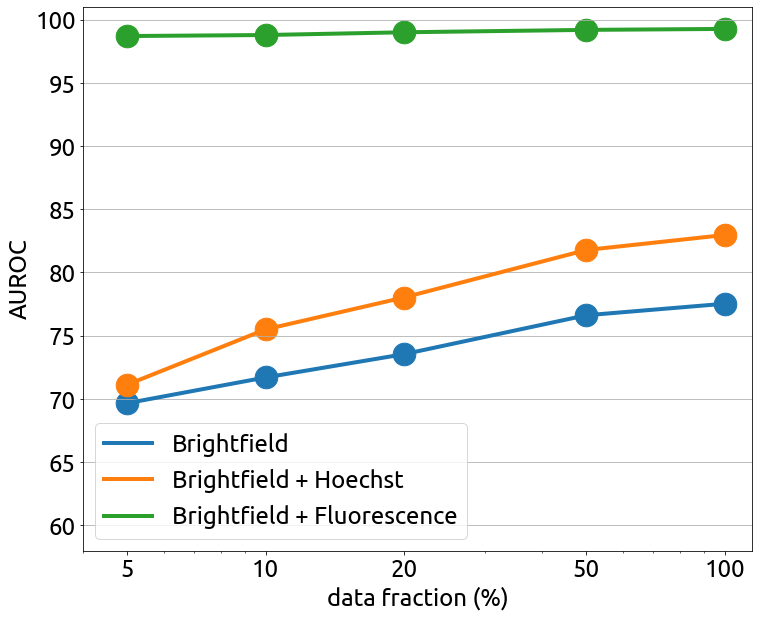

In [6]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Ubuntu',
#         'family' : 'normal',
        'size'   : 24,
        }
matplotlib.rc('font', **font)
fig, ax = plt.subplots()
fig.set_size_inches(12 ,10)
ax.grid(axis = 'y')

# plt.figure(figsize = ( 8 * 2, 6 * 2))
ax.plot(br_y, br_roc, linewidth=4, label = 'Brightfield')
ax.scatter(br_y, br_roc, s = 512)
ax.plot(bru_y, bru_roc, linewidth=4, label = 'Brightfield + Hoechst')
ax.scatter(bru_y, bru_roc, s = 512)
ax.plot(brfl_y, brfl_roc, linewidth=4, label = 'Brightfield + Fluorescence')
ax.scatter(brfl_y, brfl_roc, s = 512)

ax.set_xlabel('data fraction (%)')
ax.set_ylabel('AUROC')
ax.set_ylim(58, 101)
ax.set_xlim(4, 115)

ax.legend(loc = 'lower left')
ax.set_xscale('log')
ax.set_xticks([5, 10, 20, 50, 100])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# ax.get_xaxis().get_major_formatter().labelOnlyBase = False

# plt.plot(brfl_y, brfl_f1)
# plt.gca().get_xaxis().get_major_formatter().base = 4


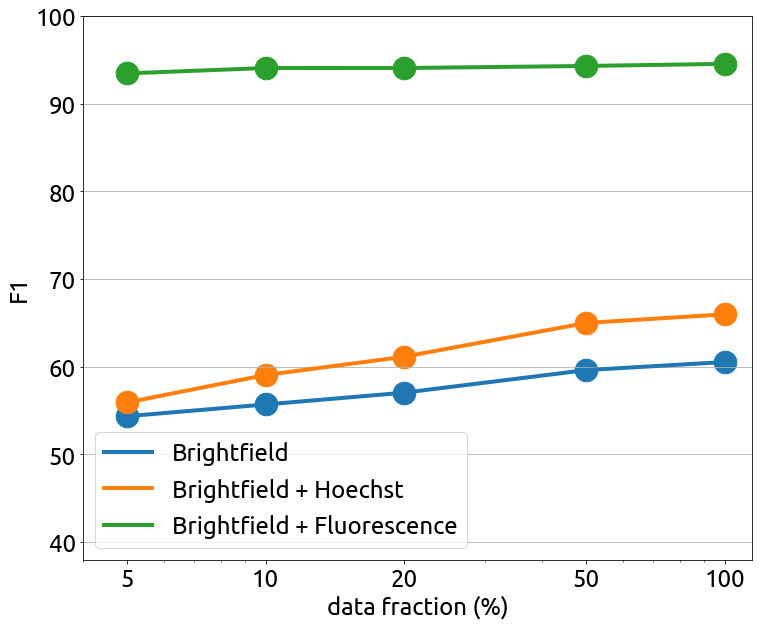

In [7]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Ubuntu',
#         'family' : 'normal',
        'size'   : 24,
        }
matplotlib.rc('font', **font)
fig, ax = plt.subplots()
fig.set_size_inches(12 ,10)
ax.grid(axis = 'y')

# plt.figure(figsize = ( 8 * 2, 6 * 2))
ax.plot(br_y, br_f1, linewidth=4, label = 'Brightfield')
ax.scatter(br_y, br_f1, s = 512)
ax.plot(bru_y, bru_f1, linewidth=4, label = 'Brightfield + Hoechst')
ax.scatter(bru_y, bru_f1, s = 512)
ax.plot(brfl_y, brfl_f1, linewidth=4, label = 'Brightfield + Fluorescence')
ax.scatter(brfl_y, brfl_f1, s = 512)

ax.set_xlabel('data fraction (%)')
ax.set_ylabel('F1')
ax.set_ylim(38, 100)
ax.set_xlim(4, 115)

ax.legend(loc = 'lower left')
ax.set_xscale('log')
ax.set_xticks([5, 10, 20, 50, 100])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# ax.get_xaxis().get_major_formatter().labelOnlyBase = False

# plt.plot(brfl_y, brfl_f1)
# plt.gca().get_xaxis().get_major_formatter().base = 4
